<a href="https://colab.research.google.com/github/xander-bennett/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/Xander_Bennett_DS7_LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) (try the [`altair`](https://altair-viz.github.io/gallery/index.html#maps) library)
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) (try the [`statsmodels`](https://www.statsmodels.org/stable/index.html) library)
- or another example of your choice!











In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

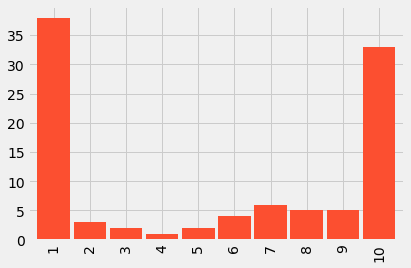

In [2]:
plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

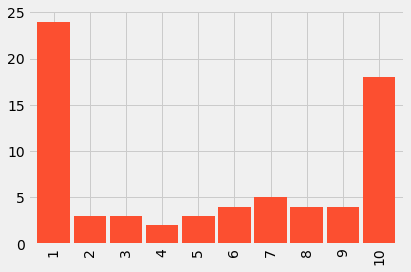

In [3]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])
fake2.value_counts().sort_index().plot.bar(color='C1', width = .9);
# fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

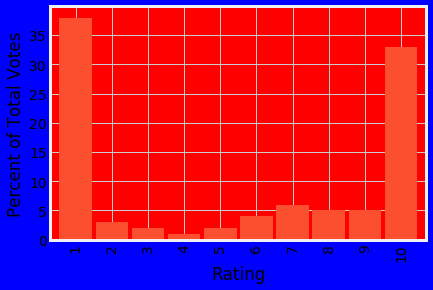

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from IPython.display import display, Image

plt.style.use('fivethirtyeight')

fig = plt.figure()
fig.patch.set_facecolor('blue')
# The blue background color is to highlite the 'figure' background

ax = fake.plot.bar(color='C1', width=0.9)
ax.set(facecolor='red')
# This red background is the 'axes' (not axis) background.

# If you put these labels before the fig variable, the order the code runs will actually create two tables. The current order makes fig and ax first, then adds labels.
plt.xlabel("Rating")
plt.ylabel("Percent of Total Votes")

plt.show()

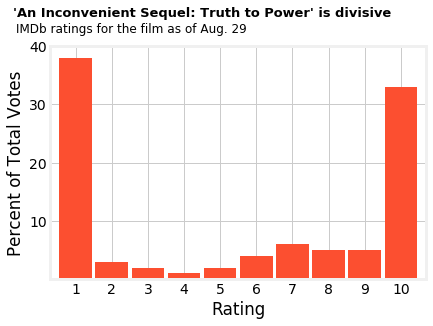

In [5]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

fig = plt.figure()
fig.patch.set(facecolor='white')



ax = fake.plot.bar(color='C1', width=0.9)
ax.set(facecolor='white')
# This red background is the 'axes' (not axis) background.

ax.text(x=-1.65, y=42.3, s='IMDb ratings for the film as of Aug. 29', fontsize=12);

ax.set_xticklabels(range(1,11),rotation=0)
ax.set_yticks(range(10,50,10))
ax.set_yticklabels(range(10,50,10))

# If you put these labels before the fig variable, the order the code runs will actually create two tables. The current order makes fig and ax first, then adds labels.
plt.xlabel("Rating")
plt.ylabel("Percent of Total Votes")
plt.title("'An Inconvenient Sequel: Truth to Power' is divisive", fontsize='13', fontweight='bold', x=-.1, y=1.1, loc='left')
plt.show()

In [6]:
# Now to reproduce with real data
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.tail(5)

timestamp  respondents  ... 9_pct 10_pct
80048  2017-08-29 23:10:05.369510            8  ...  25.0   12.5
80049  2017-08-29 23:10:05.598331           41  ...   2.4   14.6
80050  2017-08-29 23:10:05.794141          925  ...   6.5   28.0
80051  2017-08-29 23:10:06.022268          565  ...   6.2   36.1
80052  2017-08-29 23:10:06.218251         2662  ...   5.5   33.7

[5 rows x 27 columns]

In [7]:
df.dtypes

timestamp       object
respondents      int64
category        object
link            object
average        float64
mean           float64
median           int64
1_votes          int64
2_votes          int64
3_votes          int64
4_votes          int64
5_votes          int64
6_votes          int64
7_votes          int64
8_votes          int64
9_votes          int64
10_votes         int64
1_pct          float64
2_pct          float64
3_pct          float64
4_pct          float64
5_pct          float64
6_pct          float64
7_pct          float64
8_pct          float64
9_pct          float64
10_pct         float64
dtype: object

In [0]:
# The dates are listed as objects and not as date-time

In [9]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [10]:
df.set_index('timestamp', inplace=True)
df['2017-08-29']

respondents            category  ... 9_pct  10_pct
timestamp                                                    ...              
2017-08-29 00:00:02.248882         1682               Males  ...   4.9    30.9
2017-08-29 00:00:02.499363          257             Females  ...  10.1    51.0
2017-08-29 00:00:02.727204           15       Aged under 18  ...   0.0    40.0
2017-08-29 00:00:03.024270           13      Males under 18  ...   0.0    46.2
2017-08-29 00:00:03.248207            2    Females under 18  ...   0.0     0.0
2017-08-29 00:00:03.441529          450          Aged 18-29  ...   5.1    42.2
2017-08-29 00:00:03.636825          402    Males Aged 18-29  ...   5.2    40.5
2017-08-29 00:00:03.839446           41  Females Aged 18-29  ...   4.9    56.1
2017-08-29 00:00:04.030663          771          Aged 30-44  ...   6.4    32.4
2017-08-29 00:00:04.225962          679    Males Aged 30-44  ...   5.7    29.5
2017-08-29 00:00:04.539312           76  Females Aged 30-44  ...  11.8    61.8
2017-08-29 00:00:04.776104          539            Aged 45+  ...   6.5    24.5
2017-08-29 00:00:04.973766          421      Males Aged 45+  ...   4.8    20.4
2017-08-29 00:00:05.176998          109    Females Aged 45+  ...  13.8    40.4
2017-08-29 00:00:05.366554            8          IMDb staff  ...  25.0    12.5
2017-08-29 00:00:05.556598           41     Top 1000 voters  ...   2.4    14.6
2017-08-29 00:00:05.767397          922            US users  ...   6.3    28.1
2017-08-29 00:00:05.964362          556        Non-US users  ...   6.3    36.3
2017-08-29 00:00:06.288486         2646          IMDb users  ...   5.4    33.7
2017-08-29 00:10:02.437655         1682               Males  ...   4.9    30.9
2017-08-29 00:10:02.715850          257             Females  ...  10.1    51.0
2017-08-29 00:10:02.974317           15       Aged under 18  ...   0.0    40.0
2017-08-29 00:10:03.242796           13      Males under 18  ...   0.0    46.2
2017-08-29 00:10:03.471974            2    Females under 18  ...   0.0     0.0
2017-08-29 00:10:03.701915          450          Aged 18-29  ...   5.1    42.2
2017-08-29 00:10:03.922894          402    Males Aged 18-29  ...   5.2    40.5
2017-08-29 00:10:04.168584           41  Females Aged 18-29  ...   4.9    56.1
2017-08-29 00:10:04.391835          771          Aged 30-44  ...   6.4    32.4
2017-08-29 00:10:04.630956          679    Males Aged 30-44  ...   5.7    29.5
2017-08-29 00:10:04.819991           76  Females Aged 30-44  ...  11.8    61.8
...                                 ...                 ...  ...   ...     ...
2017-08-29 23:00:03.683160          775          Aged 30-44  ...   6.5    32.3
2017-08-29 23:00:03.924760          682    Males Aged 30-44  ...   5.7    29.3
2017-08-29 23:00:04.189034           77  Females Aged 30-44  ...  13.0    61.0
2017-08-29 23:00:04.381826          544            Aged 45+  ...   6.6    24.4
2017-08-29 23:00:04.619175          424      Males Aged 45+  ...   4.7    20.5
2017-08-29 23:00:04.820031          111    Females Aged 45+  ...  14.4    39.6
2017-08-29 23:00:05.028872            8          IMDb staff  ...  25.0    12.5
2017-08-29 23:00:05.231674           41     Top 1000 voters  ...   2.4    14.6
2017-08-29 23:00:05.442596          925            US users  ...   6.5    28.0
2017-08-29 23:00:05.634805          565        Non-US users  ...   6.2    36.1
2017-08-29 23:00:05.829558         2662          IMDb users  ...   5.5    33.7
2017-08-29 23:10:02.207706         1693               Males  ...   4.9    30.8
2017-08-29 23:10:02.398710          261             Females  ...  10.7    50.2
2017-08-29 23:10:02.622019           15       Aged under 18  ...   0.0    40.0
2017-08-29 23:10:02.908857           13      Males under 18  ...   0.0    46.2
2017-08-29 23:10:03.088635            2    Females under 18  ...   0.0     0.0
2017-08-29 23:10:03.288272          455          Aged 18-29  ...   5.1    42.0
2017-08-29 23:10:03.501039          406    Males Aged 18-29  ...   5.2    40.4

In [12]:
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail(30)

respondents    category  ... 9_pct  10_pct
timestamp                                            ...              
2017-08-29 18:20:06.215486         2654  IMDb users  ...   5.4    33.8
2017-08-29 18:30:06.738669         2654  IMDb users  ...   5.4    33.8
2017-08-29 18:40:05.771150         2654  IMDb users  ...   5.4    33.8
2017-08-29 18:50:06.051326         2654  IMDb users  ...   5.4    33.8
2017-08-29 19:00:06.002542         2654  IMDb users  ...   5.4    33.8
2017-08-29 19:10:06.066863         2654  IMDb users  ...   5.4    33.8
2017-08-29 19:20:06.286871         2654  IMDb users  ...   5.4    33.8
2017-08-29 19:30:06.395003         2654  IMDb users  ...   5.4    33.8
2017-08-29 19:40:06.372808         2654  IMDb users  ...   5.4    33.8
2017-08-29 19:50:06.030788         2654  IMDb users  ...   5.4    33.8
2017-08-29 20:00:06.213617         2660  IMDb users  ...   5.5    33.7
2017-08-29 20:10:06.353175         2660  IMDb users  ...   5.5    33.7
2017-08-29 20:20:06.692848         2660  IMDb users  ...   5.5    33.7
2017-08-29 20:30:06.047404         2660  IMDb users  ...   5.5    33.7
2017-08-29 20:40:06.341599         2660  IMDb users  ...   5.5    33.7
2017-08-29 20:50:06.265539         2660  IMDb users  ...   5.5    33.7
2017-08-29 21:00:07.056294         2660  IMDb users  ...   5.5    33.7
2017-08-29 21:10:06.940833         2660  IMDb users  ...   5.5    33.7
2017-08-29 21:20:06.241187         2660  IMDb users  ...   5.5    33.7
2017-08-29 21:30:06.277390         2660  IMDb users  ...   5.5    33.7
2017-08-29 21:40:06.384083         2660  IMDb users  ...   5.5    33.7
2017-08-29 21:50:06.071510         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:00:06.565253         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:10:07.085246         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:20:06.947696         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:30:06.423181         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:40:06.233659         2662  IMDb users  ...   5.5    33.7
2017-08-29 22:50:06.592571         2662  IMDb users  ...   5.5    33.7
2017-08-29 23:00:05.829558         2662  IMDb users  ...   5.5    33.7
2017-08-29 23:10:06.218251         2662  IMDb users  ...   5.5    33.7

[30 rows x 26 columns]

In [13]:
df['category'].value_counts()

Females Aged 45+      4216
IMDb users            4216
IMDb staff            4216
Males under 18        4216
Aged under 18         4216
Males                 4216
Top 1000 voters       4216
Males Aged 30-44      4216
Females Aged 18-29    4216
Non-US users          4216
Females Aged 30-44    4216
Males Aged 18-29      4216
Aged 45+              4216
Aged 30-44            4216
Aged 18-29            4216
Females               4216
US users              4216
Males Aged 45+        4216
Females under 18      4165
Name: category, dtype: int64

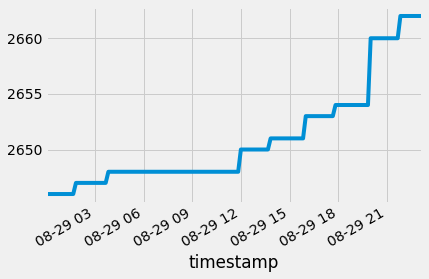

In [14]:
lastday_filtered.respondents.plot()

In [15]:
final = lastday_filtered.tail(1)
final.T

timestamp                     2017-08-29 23:10:06.218251
respondents                                         2662
category                                      IMDb users
link         http://www.imdb.com/title/tt6322922/ratings
average                                              5.4
mean                                                 5.6
median                                                 7
1_votes                                             1021
2_votes                                               69
3_votes                                               38
4_votes                                               25
5_votes                                               55
6_votes                                              110
7_votes                                              154
8_votes                                              147
9_votes                                              146
10_votes                                             897
1_pct                                               38.4
2_pct                                                2.6
3_pct                                                1.4
4_pct                                                0.9
5_pct                                                2.1
6_pct                                                4.1
7_pct                                                5.8
8_pct                                                5.5
9_pct                                                5.5
10_pct                                              33.7

In [16]:
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp  2017-08-29 23:10:06.218251
1_pct                            38.4
2_pct                             2.6
3_pct                             1.4
4_pct                             0.9
5_pct                             2.1
6_pct                             4.1
7_pct                             5.8
8_pct                             5.5
9_pct                             5.5
10_pct                           33.7

In [17]:
plot_data = final[pct_columns].T
plot_data.index = range(1, 11)
plot_data

timestamp  2017-08-29 23:10:06.218251
1                                38.4
2                                 2.6
3                                 1.4
4                                 0.9
5                                 2.1
6                                 4.1
7                                 5.8
8                                 5.5
9                                 5.5
10                               33.7

<Figure size 432x288 with 0 Axes>

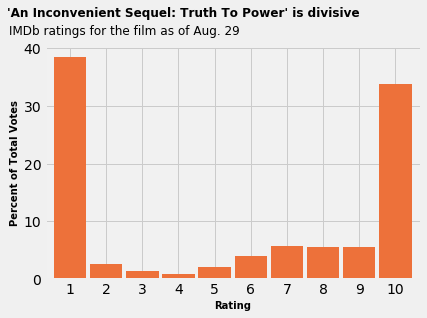

In [18]:
plt.style.use('fivethirtyeight')

fig = plt.figure()
fig.patch.set(facecolor='white')

# Make figure facecolor to 0% opaque (transparent)
fig.patch.set_alpha(0)

ax = plot_data.plot.bar(color='#ED713A', width=0.9)
ax.set(facecolor='white')

# Make axes facecolor to 0% opaque (transparent)
ax.patch.set_alpha(.1)

ax.text(x=-1.7, y=42.3, s="IMDb ratings for the film as of Aug. 29", fontsize=12);

ax.set_xticklabels(range(1,11, 1), rotation=0)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0,50,10))

# Remove Legend
ax.get_legend().remove()

plt.xlabel("Rating", fontsize=10, fontweight='bold')
plt.ylabel("Percent of Total Votes", fontsize='10', fontweight='bold')
plt.title( "'An Inconvenient Sequel: Truth To Power' is divisive", fontsize='12', fontweight='bold', x=-.1, y=1.1, loc='left')

plt.show()

## 2nd Part of assignment - Thanksgiving

In [0]:
import altair as alt

df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/thanksgiving-2015/thanksgiving-2015-poll-data.csv')

In [22]:
df.head()

RespondentID  ...           US Region
0    4337954960  ...     Middle Atlantic
1    4337951949  ...  East South Central
2    4337935621  ...            Mountain
3    4337933040  ...             Pacific
4    4337931983  ...             Pacific

[5 rows x 65 columns]

In [38]:
# df1 = df.drop.(['What is typically the main dish at your Thanksgiving dinner? - Other (please specify)','What is typically the main dish at your Thanksgiving dinner?'], axis=1)

df1 = df.iloc[:, [11,12,13,14,15,16,17,18,
                  19, 20, 21, 22, 23, 24, 25, -1]]
df1.head()

Which of these side dishes aretypically served at your Thanksgiving dinner? Please select all that apply. - Brussel sprouts  ...           US Region
0                                                NaN                                                                           ...     Middle Atlantic
1                                                NaN                                                                           ...  East South Central
2                                    Brussel sprouts                                                                           ...            Mountain
3                                    Brussel sprouts                                                                           ...             Pacific
4                                    Brussel sprouts                                                                           ...             Pacific

[5 rows x 16 columns]

In [39]:
df1.columns = ['Brussel sprouts','Carrots','Cauliflower',
                'Corn','Cornbread','Fruit salad', 
               'Green beans/green bean casserole', 'Macaroni and cheese', 
               'Mashed potatoes', 'Rolls/biscuits', 'Squash', 'Vegetable salad',
               'Yams/sweet potato casserole', 'Other (please specify)', 
               'Other (please specify)', 'US Region']
df1.head()

Brussel sprouts  Carrots  ...  Other (please specify)           US Region
0              NaN  Carrots  ...                     NaN     Middle Atlantic
1              NaN      NaN  ...  Asian vinagrette salad  East South Central
2  Brussel sprouts  Carrots  ...                     NaN            Mountain
3  Brussel sprouts      NaN  ...                     NaN             Pacific
4  Brussel sprouts      NaN  ...                     NaN             Pacific

[5 rows x 16 columns]

In [52]:
df1.count()

Brussel sprouts                     155
Carrots                             242
Cauliflower                          88
Corn                                464
Cornbread                           235
Fruit salad                         215
Green beans/green bean casserole    686
Macaroni and cheese                 206
Mashed potatoes                     817
Rolls/biscuits                      766
Squash                              171
Vegetable salad                     209
Yams/sweet potato casserole         631
Other (please specify)              111
Other (please specify)              111
US Region                           999
dtype: int64

In [50]:
# This was a rabbit hole, going back to playing with matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import Autominorlocator, MultipleLocator, FuncFormatter


x = np.linspace(0.5,3.5,100)
Y1 = 3+
# set seed for reproducibility

alt.Chart(...)

# STRETCH OPTIONS

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).


### 3) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here